# **IEOR 4404  Simulation (Fall 2020)**

**Homework 5 Solution  [Total points: 80 Points]**


**Due 11:59 PM, Nov 14**

Homework 4 consists of application-oriented exercises focusing on:
* `simpy` simulation of systems

The steps to finish the homework:

*   Step 1: Answer your homework on Google Colab.
*   Step 2: Submit the copy on Google Assignment

Before you submit your assignment, make sure to re-run your code from the beginning. (You can do so by first clicking Runtime/Reset All Runtimes and then clicking Runtime/Run all)



In [ ]:
#Your Name:
#Your UNI:

In [ ]:
#This imports all the packages you need for the homework
#Please run this first
import numpy as np


import scipy.special as spsp
import scipy.stats as spst

import matplotlib.pyplot as plt

%matplotlib inline

import sympy
!pip install simpy
import simpy
 

#Exercise 1 [20 Points]

A M/M/1 queue represents the queue length in a system having a **single server**, where arrivals are determined by a **Homogeneous Poisson process** with rate $\lambda$ and job service times have an **exponential distribution** with rate $\mu$ (i.e. mean service time is $1/\mu$). 





##Q1.  [12 points]

A M/M/1 system is stationary if $\lambda<\mu$. For a non-stationary system, the queue will growing indefinitely long as time goes to inifinity. 

* Construct a M/M/1 system using `simpy` assume $\lambda=8$ and $\mu=2$. Use `Rn_arrival=np.random.RandomState(10)` to generate the random numbers used to generate the arrival times. Use `Rn_service=np.random.RandomState(100)` to the random numbers used to generate the service times. Simulate the sytem between $t=0$ and $t=100$

* Plot the relationship between time and the number of people in the system above (including both lining up and receiving the service ) using  [plt.step()](https://www.geeksforgeeks.org/matplotlib-pyplot-step-function-in-python/). Argue that the system is not stationary.

* Change to $\lambda=1$ and $\mu=2$. Plot the relationship between the time and the number of people in the system above (including both lining up and receiving the service ) from $t=0$ to  $t=100$ using [plt.step()](https://www.geeksforgeeks.org/matplotlib-pyplot-step-function-in-python/).  

 
 

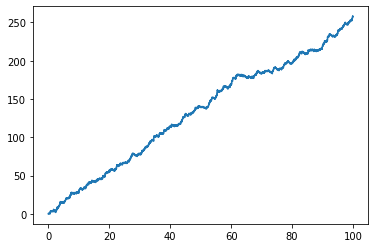

In [ ]:
lmbda=8
mu=2
def arrival():
    while True:
        inter_arrival=-1/lmbda*np.log(Rn_arrival.rand())
        yield env.timeout(inter_arrival)
        #generating a new service process for the new arrival
        env.process(service())
        time.append(env.now)
        number.append(number[-1]+1)
def service():
    #send a request to the server (an event)
    rqt=desk.request()
    #customer occupy the server
    yield rqt
     
    service_time=-1/mu*np.log(Rn_service.rand())
    yield env.timeout(0.2)
    #release the request from the server
    #so that the server will be able to take care of the next customer
    desk.release(rqt)
    time.append(env.now)
    number.append(number[-1]-1)
env=simpy.Environment()
env.process(arrival())
time=[0]
number=[0]
Rn_arrival=np.random.RandomState(10) 
Rn_service=np.random.RandomState(100)

#define a server with capacity=1 
desk=simpy.Resource(env,capacity=1)
T=100
env.run(until=T)
plt.step(time,number,where="post")

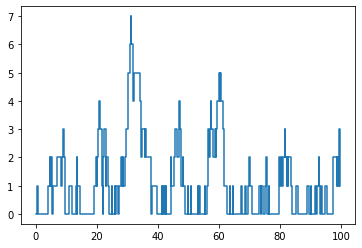

In [ ]:
lmbda=1
mu=2
def arrival():
    while True:
        inter_arrival=-1/lmbda*np.log(Rn_arrival.rand())
        yield env.timeout(inter_arrival)
        #generating a new service process for the new arrival
        env.process(service())
        time.append(env.now)
        number.append(number[-1]+1)
def service():
    #send a request to the server (an event)
    rqt=desk.request()
    #customer occupy the server
    yield rqt
     
    service_time=-1/mu*np.log(Rn_service.rand())
    yield env.timeout(service_time)
    #release the request from the server
    #so that the server will be able to take care of the next customer
    desk.release(rqt)
    time.append(env.now)
    number.append(number[-1]-1)
env=simpy.Environment()
env.process(arrival())
time=[0]
number=[0]
Rn_arrival=np.random.RandomState(10) 
Rn_service=np.random.RandomState(100)

#define a server with capacity=1 
desk=simpy.Resource(env,capacity=1)
T=100
env.run(until=T)
plt.step(time,number,where="post")

##Q2. [8 points]

If the system is stationary, then the probability of having $i$ customers at a sufficiently larget $t$ (including the one in service) is 

$P(i)=(1-\rho)\rho^i, i=0,1,2, \dots$ .

where $\rho=\frac{\lambda}{\mu}$

For this question, let's assume we have a M/M/1 system with $\lambda=1.5$ and $\mu=2$

* Simulate the system to record the number of people in the system at t=100.
* Repeat the system simulation 1000 times.
* Plot the sample and theoretical distribution of the number of people in the system at t=100.

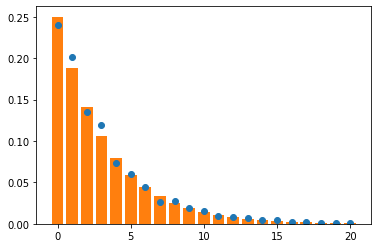

In [ ]:
lmbda=1.5
mu=2
def arrival(env,number, desk):
    while True:
        inter_arrival=-1/lmbda*np.log(Rn_arrival.rand())
        yield env.timeout(inter_arrival)
        #generating a new service process for the new arrival
        env.process(service(env,number, desk))
        number[0]+=1 
def service(env,number, desk):
    #send a request to the server (an event)
    rqt=desk.request()
    #customer occupy the server
    yield rqt
     
    service_time=-1/mu*np.log(Rn_service.rand())
    yield env.timeout(service_time)
    #release the request from the server
    #so that the server will be able to take care of the next customer
    desk.release(rqt)
 
    number[0]-=1 
def system():

  env=simpy.Environment()
  number=[0]
      #define a server with capacity=1 
  desk=simpy.Resource(env,capacity=1)
  env.process(arrival(env,number, desk))

  T=100
  env.run(until=T)
  return number[-1]
samples=[system() for i in range(1000)]
value,counts=np.unique(samples, return_counts=True)
n=np.arange(np.max(samples)+1)
rho=lmbda/mu
pmf=(1-rho)*(rho)**n
plt.scatter(value,counts/np.sum(counts),zorder=2)
plt.bar(n,pmf)
plt.show()

#Exercise 2 [30 Points]

##Setting

![title](https://onlinevending.com/wp-content/uploads/2016/07/Untitled-106-300x300.png)

A vending machine has 15 different products. The vending machines started as full with 20 units in stock for each product (300 items in total). Customers arrive every 0.1 hours to a vending machine and make a purchase. Each customer wants to purchase $x$ units of product $i$. Let's assume that $i$ is equally likely to be between 1 and 15. For $x$, let's assume follows a discrete uniform distribution between 0 and 3. If product $i$ has stock level $s$ is lower than what the customer wants, the customer will purchase all the units left for the product $i$. 

Once the stock level of any product goes below $z$ and no refill order is waiting to be fulfilled, a refill will be requested. The refill takes 1.95 hours to be fulfilled. Once the refill request is fulfilled, the vending machine becomes full again.

Let's assume that the sales of each item generate a profit of 0.5 dollars. Each refill trip costs 20 dollars. The cost is counted once a refill process starts.

**<font color="red">In this question, you are NOT allowed to use any built-in sampling function except np.random.rand() </font>**



## Q1. [23 points]

* Based on `simpy`, simulate the system for a week. Assume $z=4$. Return the revenue from the goods minus the refill trip costs. 
* Repeat the system 100 times. Report the average revenue.

In [ ]:
def arrival(env,products,otw, sold,trips,z):
  while True:
    yield env.timeout(0.1)
    i=int(np.random.rand()*15)+1
    demand=int(np.random.rand()*4)
    #if there are enough stock
    if products[i-1]>= demand:
      products[i-1]-=demand
      sold[0]+=demand
    #if there are not enough stock
    else:
      sold[0]+=products[i-1]
      products[i-1]=0
    #if stock is low and no refill is on the way, place a refill order
    if np.min(np.array(products))<z and otw[0]==False:
      env.process(refill(env,products,otw))
      otw[0]=True
      trips[0]+=1

def refill(env,products,otw):
  yield env.timeout(1.95)
  for i in range(15):
    products[i]=20
  otw[0]=False

def system(z):
  products=np.repeat(20,15).tolist()
  env=simpy.Environment()
  otw=[False]
  sold=[0]
  trips=[0]
  env.process(arrival(env,products,otw, sold,trips,z))
  env.run(until=24*7)
  return 0.5*sold[0]-trips[0]*20 

#np.mean([system(4) for i in range(100)])


system(4)
[system(4) for i in range(100)]

952.0

##Q2. [7 points]

* Now, use different $z$ values for the exercise in Q1. Plot the relationship between $z$ and the average system output.
* Find the best $z$ value.

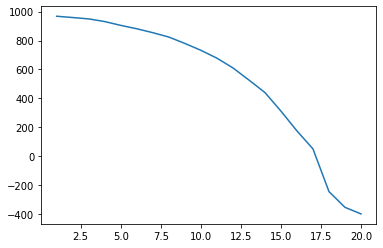

In [ ]:
S=np.empty(20)
for z in range(1,21):
  S[z-1]=np.mean([system(z) for i in range(100)])
plt.plot(range(1,21),S)

In [ ]:
np.argmax(S)+1

1

## Exercise 3 [30 Points]




![title](https://images.squarespace-cdn.com/content/v1/518ac285e4b0288d5ff90c6f/1377221007294-HNC3JDD4UW9QY2G5LC1D/ke17ZwdGBToddI8pDm48kCMWMBFcqQftRz-JqZZoIB5Zw-zPPgdn4jUwVcJE1ZvWEtT5uBSRWt4vQZAgTJucoTqqXjS3CfNDSuuf31e0tVHNITcGTe41xBuPe_t-alTYdDq7Kkl9qklZ5rK1q7N4dsyd8tRlQIE8kTD4VvGRtXw/car-wash-hand-dry-hp.jpg) 



Customers arrive at a car wash shop following a homogeneous Poisson process with $\lambda=5$ [expected number arrivals is 5 per hour] between hour 8 (8 am)  and 20 (8 pm). 
Upon arrival, they will get auto-cleaning service （including payment）. The service time follows:

|Service Type | Time| Choice Probability|Price| 
|---|---|---|---|
|Silver|5 minutes|0.3|10 dollars|
|Gold|6 minutes|0.5|12 dollars|
|Platinum|7 minutes|0.2|15 dollars|

The auto-cleaning device can only take 1 customer at a time. The service order follows first come first serve.


After this stage, cars will then wait for workers to hand-dry the car. There are two people doing the job. Depending on the car, worker 1 can take uniformly between 10 and 20 minutes, while worker 2 can take uniformly between 15 and 30 minutes. Each worker knows exactly how long it will take after they identify the car and before they start the drying process.

|Worker|  Service Time|
|---|---|
|1|Uniform(10,20)|
|2|Uniform(15,30)|

[Worker 1 in general will be faster than worker 2 when working alone]

A car will receive the service with the worker who becomes available first. The service order follows first come first serve.

If both worker 1 and worker 2 are available at the same time, 
* worker 2 will work on the car if he expects the drying process will take less than 25 minutes when working alone.
* otherwise, worker 1 and worker 2 will work together. The service time will be half of the time if worker 2 works alone. 


Due to space limit, the system can only accomendate 5 cars at the same time (including both cars receiving the service and cars waiting). If a car cannot fit in the system, the car will leave and not return. 

 

Cars arrived before hour 8 and after hour 20 cannot enter. However, all cars entered before hour 20 will finish receiving the service.

**<font color="red">In this question, you are NOT allowed to use any built-in sampling function except np.random.rand() </font>**



##Q1. [23 Points]

* Simulate the system to compute the revenue generated during the day.
* Simulate the system for 1000 rounds. Plot the distribution of the profit.



(array([  1.,   0.,   0.,   2.,   4.,  10.,  40.,  39.,  74.,  88., 140.,
        138., 145., 126.,  85.,  48.,  32.,  19.,   6.,   3.]),
 array([382.  , 406.75, 431.5 , 456.25, 481.  , 505.75, 530.5 , 555.25,
        580.  , 604.75, 629.5 , 654.25, 679.  , 703.75, 728.5 , 753.25,
        778.  , 802.75, 827.5 , 852.25, 877.  ]),
 <a list of 20 Patch objects>)

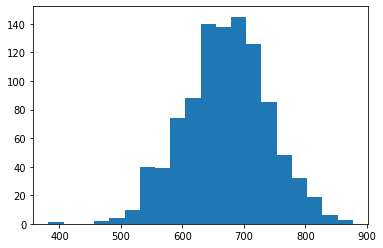

In [ ]:
def arrival(env,auto,dry1,dry2,N_total,cars):
  N_total[0]=0
  while True:
    lmbda=5
    inter_arrival=-1/lmbda*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    #if the current arrival is surpasses hour 20, should not generate a new service process
    #stop generate arrivals
    if env.now>12:
      return
    #if there are currently fewer than 5 cars, this car can enter
    #generate a new process for this car
    elif N_total[0]<=4:
      N_total[0]+=1
      env.process(service(env,auto,dry1,dry2,N_total,cars))

def service(env,auto,dry1,dry2,N_total,cars):
  #auto-wash process
  rqt=auto.request()
  yield rqt
  u=np.random.rand()
  #silver serivce
  if u<0.3:
    servicet=5/60
    yield env.timeout(servicet)
    cars[0]+=1
  #gold service
  elif u<0.8:
    servicet=6/60
    yield env.timeout(servicet)
    cars[1]+=1
  #platinum service
  else:
    servicet=7/60
    yield env.timeout(servicet)
    cars[2]+=1
  auto.release(rqt)
  #hand dry process
  rqt1=dry1.request()
  rqt2=dry2.request()
  result=yield rqt1|rqt2

  if rqt1 in result:
    #if only worker 1 is available
    if rqt2 not in result:
      rqt2.cancel()
      servicet=np.random.rand()*10+10
      servicet=servicet/60
      yield env.timeout(servicet)
      dry1.release(rqt1)
    #if both workers are available
    else:
      servicet=np.random.rand()*15+15
      if servicet>25:
        servicet=servicet/60
        yield env.timeout(servicet/2)
        dry1.release(rqt1) 
        dry2.release(rqt2)
      else:
        servicet=servicet/60
        dry1.release(rqt1) 
        yield env.timeout(servicet)
        dry2.release(rqt2)
  #if only one worker is available
  else:
      rqt1.cancel()
      servicet=np.random.rand()*15+15
      servicet=servicet/60
      yield env.timeout(servicet)
      dry2.release(rqt2)
  N_total[0]-=1

def system():
  N_total=[0]
  cars=[0,0,0]
  env=simpy.Environment()
  auto=simpy.Resource(env)
  dry1=simpy.Resource(env)
  dry2=simpy.Resource(env)
  env.process(arrival(env,auto,dry1,dry2,N_total, cars))
  #if a student has env.run(until=12) or env.run(until=60*12), it is wrong, as
  # it is assuming cars arrived before hour 12 but have not received the service 
  #before hour 12 cannot receive the service
  env.run()
  return np.sum(np.array(cars)*np.array([10,12,15]))
#def system_30():
#  return np.sum([system() for i in range(30)])

#system_30()

profit=[system() for i in range(1000)]
plt.hist(np.array(profit),bins=20)

##Q2. [7 Points]

The company thinking about purchasing a device that would auto-dry the car. This will add 1 minute to the auto-service time. For the hand-dry part, the service will only be 20% of the previous time. 

In addition, for the hand-dry part, the cars will receive the service with the worker available first. In addition, if both worker1 and worker 2 are available, worker 2 will always get the customer. Worker 1 and Worker 2 will not work the same car anymore. 

* Based on simulation, decide whether this plan will increase revenue.

(array([  2.,   2.,   2.,   8.,   8.,  31.,  41.,  52.,  93., 100., 111.,
        152., 104.,  85.,  85.,  54.,  31.,  25.,   7.,   7.]),
 array([392.  , 420.35, 448.7 , 477.05, 505.4 , 533.75, 562.1 , 590.45,
        618.8 , 647.15, 675.5 , 703.85, 732.2 , 760.55, 788.9 , 817.25,
        845.6 , 873.95, 902.3 , 930.65, 959.  ]),
 <a list of 20 Patch objects>)

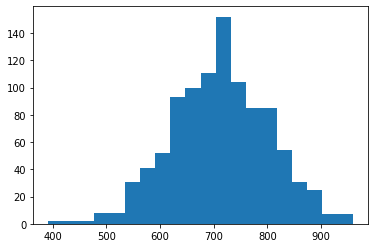

In [ ]:
def arrival(env,auto,dry1,dry2,N_total,cars):
  N_total[0]=0
  while True:
    lmbda=5
    inter_arrival=-1/lmbda*np.log(np.random.rand())
    yield env.timeout(inter_arrival)
    if env.now>12:
      return
    elif N_total[0]<=4:
      N_total[0]+=1
      env.process(service(env,auto,dry1,dry2,N_total,cars))

def service(env,auto,dry1,dry2,N_total,cars):
  rqt=auto.request()
  yield rqt
  u=np.random.rand()
  if u<0.3:
    servicet=(5+1)/60
    yield env.timeout(servicet)
    cars[0]+=1
  elif u<0.8:
    servicet=(6+1)/60
    yield env.timeout(servicet)
    cars[1]+=1
  else:
    servicet=(6+1)/60
    yield env.timeout(servicet)
    cars[2]+=1
  auto.release(rqt)

  rqt1=dry1.request()
  rqt2=dry2.request()
  result=yield rqt1|rqt2
  #if only worker 1 is available, worker 1 gets the car
  if rqt1 in result and rqt2 not in result:
      rqt2.cancel()
      servicet=np.random.rand()*10+10
      servicet=servicet/60
      yield env.timeout(servicet*0.2)
      dry1.release(rqt1)
  # if worker 2 is available, worker 2 gets the car
  else:
      #delete the request from both queue and users list from worker 1
      dry1.release(rqt1) 
      rqt1.cancel()
      servicet=np.random.rand()*15+15
      servicet=servicet/60

      yield env.timeout(servicet*0.2)
      dry2.release(rqt2)
  N_total[0]-=1

def system():
  N_total=[0]
  cars=[0,0,0]
  env=simpy.Environment()
  auto=simpy.Resource(env)
  dry1=simpy.Resource(env)
  dry2=simpy.Resource(env)
  env.process(arrival(env,auto,dry1,dry2,N_total, cars))
  env.run()
  return np.sum(np.array(cars)*np.array([10,12,15]))
#def system_30():
#  return np.sum([system() for i in range(30)])

#system_30()

profit=[system() for i in range(1000)]
plt.hist(np.array(profit),bins=20)